Supervised Learning: Regression


In [2]:
%matplotlib inline

#Importation
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_diabetes #import the dataset loader

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


diabetes = load_diabetes() #load the dataset

Prepare the dataset

In [3]:
diabetes.keys()

dict_keys(['feature_names', 'target', 'DESCR', 'data'])

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
diabetes.DESCR.splitlines()

['Diabetes dataset',
 '================',
 '',
 'Notes',
 '-----',
 '',
 'Ten baseline variables, age, sex, body mass index, average blood',
 'pressure, and six blood serum measurements were obtained for each of n =',
 '442 diabetes patients, as well as the response of interest, a',
 'quantitative measure of disease progression one year after baseline.',
 '',
 'Data Set Characteristics:',
 '',
 '  :Number of Instances: 442',
 '',
 '  :Number of Attributes: First 10 columns are numeric predictive values',
 '',
 '  :Target: Column 11 is a quantitative measure of disease progression one year after baseline',
 '',
 '  :Attributes:',
 '    :Age:',
 '    :Sex:',
 '    :Body mass index:',
 '    :Average blood pressure:',
 '    :S1:',
 '    :S2:',
 '    :S3:',
 '    :S4:',
 '    :S5:',
 '    :S6:',
 '',
 'Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).',
 '',
 'Source URL:

In [6]:
df= pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
df['disease_progression'] = diabetes.target
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


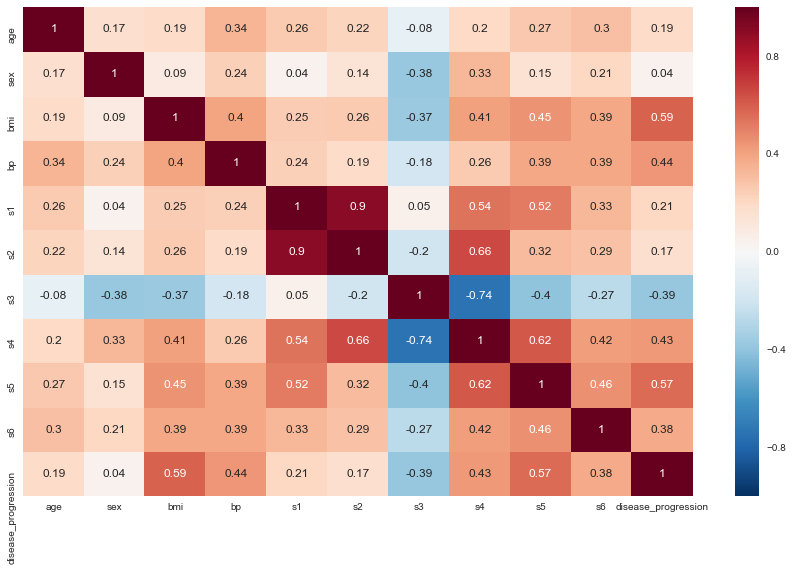

In [8]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(15,9)})
sns.heatmap(data=correlation_matrix, annot=True)

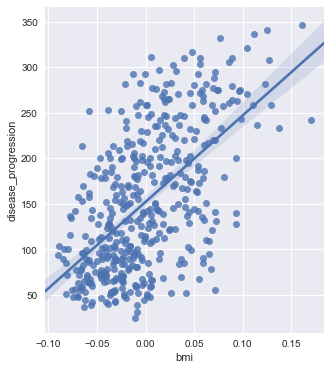

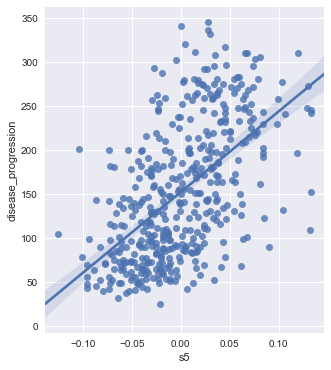

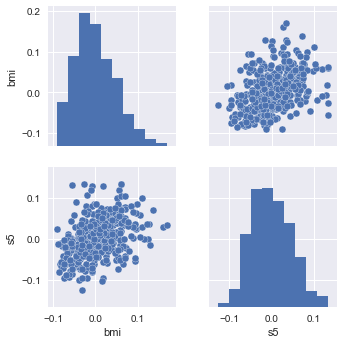

In [9]:

def visualize(selected_features):
        for var in selected_features:
            f, ax = plt.subplots(figsize=(5, 6))
            sns.regplot(x=var, y="disease_progression", data=df, ax=ax);
        sns.pairplot(df, vars=selected_features)
    
visualize(['bmi','s5'])

In [10]:
def model(selected_features):
    X = df[selected_features]
    y = pd.DataFrame(data=diabetes.target)
    clf = linear_model.LinearRegression()
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=7)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae= mean_absolute_error(y_test, y_pred)
    rscore = r2_score(y_test, y_pred)
    dictionary = {"y_pred":y_pred,"mae":mae,"mse":mse,"rscore":rscore,"intercept":clf.intercept_,"coef":clf.coef_, "y_test":y_test,}
    return dictionary

In [11]:
model1 = model(['bmi'])
model2 = model(['bmi','s5'])
model3 = model(diabetes.feature_names)

evaluations = pd.DataFrame({'Model_1':  [ model1['mae'],  model1['mse'],model1['rscore'], model1['intercept']],
                        'Model_2': [ model2['mae'],  model2['mse'],model2['rscore'], model2['intercept']],
                        'Model_3': [ model3['mae'],  model3['mse'],model3['rscore'], model3['intercept']],
                       },
                          index = pd.Index(['MAE','MSE',"R-Score","Intercept"]))

print("\n",evaluations.head())

results = pd.DataFrame({'Actual':list(model1['y_test'][0]) , 
                        'Model_1_prediction':  model1['y_pred'].flatten(),
                        'Model_2 _prediction':  model2['y_pred'].flatten(),
                        'Model_3 _prediction':  model3['y_pred'].flatten()
                       })
print("\n",results.head(10))




                         Model_1              Model_2               Model_3
MAE                     49.1332              42.8744               40.7344
MSE                     3563.82              2949.14               2785.93
R-Score                0.375247             0.483002              0.511613
Intercept  [152.98532138810083]  [152.9530078258295]  [152.58818584673236]

    Actual  Model_1_prediction  Model_2 _prediction  Model_3 _prediction
0    71.0          114.781947            89.731782            87.279845
1    81.0          144.124080           130.259144           138.301784
2    61.0          149.183068           117.444437           114.985833
3   173.0          204.831940           224.185806           218.887523
4   109.0          100.616780           201.724979           155.336866
5    66.0          129.958912           147.108516           181.489378
6    72.0           88.475207            77.712837            61.195426
7   111.0          107.699363           105.9

//anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
